In [43]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob

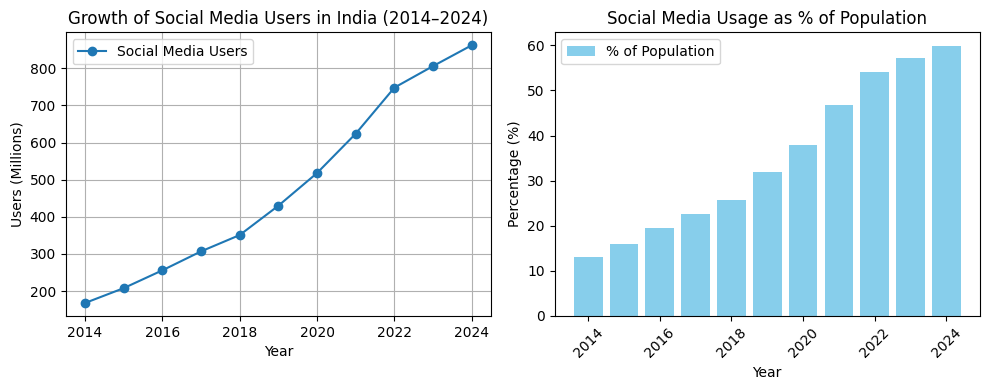

In [44]:


years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
users = [168, 208, 256, 307, 351, 430, 518, 624, 748, 806, 862.08]
population_percentage = [13.0, 16.0, 19.5, 22.5, 25.7, 32.0, 38.0, 46.7, 54.0, 57.2, 59.9]

plt.figure(figsize=(10, 4))

# Line chart for users
plt.subplot(1, 2, 1)
plt.plot(years, users, marker='o', label='Social Media Users')
plt.title('Growth of Social Media Users in India (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Users (Millions)')
plt.grid(True)
plt.legend()

# Bar chart for percentage
plt.subplot(1, 2, 2)
plt.bar(years, population_percentage, color='skyblue', label='% of Population')
plt.title('Social Media Usage as % of Population')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig('users.png' , format='png')
plt.savefig('percentageofuse.png' , format='png')
plt.show()


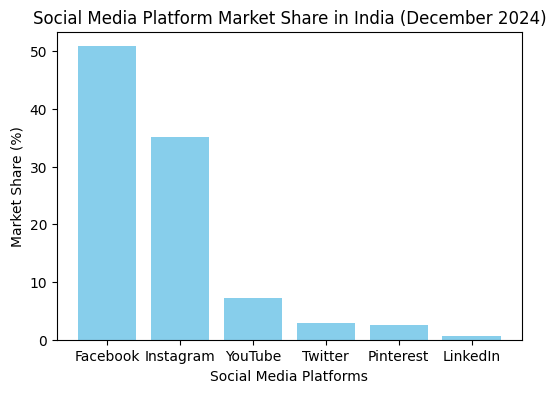

In [45]:
# As of December 2024, the distribution of social media platform usage in India is as follows:
import matplotlib.pyplot as plt

# Data
platforms = ['Facebook', 'Instagram', 'YouTube', 'Twitter', 'Pinterest', 'LinkedIn']
market_share = [50.83, 35.08, 7.16, 2.97, 2.61, 0.66]

# Create bar graph
plt.figure(figsize=(6, 4))  # Size of the plot in inches
plt.bar(platforms, market_share, color='skyblue')

# Add titles and labels
plt.title('Social Media Platform Market Share in India (December 2024)')
plt.xlabel('Social Media Platforms')
plt.ylabel('Market Share (%)')

# Save the plot as a PNG image
plt.savefig('social_media_market_share.png', format='png', dpi=100)  # 600x400 size with dpi=100

# Display the bar graph
plt.savefig('platformindia.png', format='png')
plt.show()



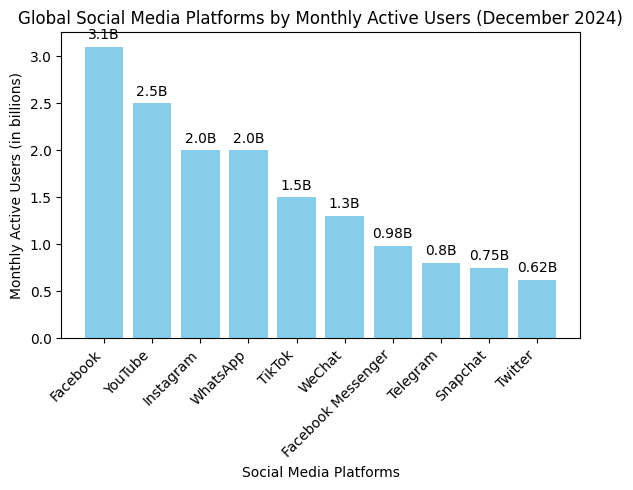

In [46]:
# As of December 2024, the global landscape of social media platforms by the number of monthly active users (in billions) is as follows:
import matplotlib.pyplot as plt

# Data
platforms = [
    'Facebook', 'YouTube', 'Instagram', 'WhatsApp', 'TikTok',
    'WeChat', 'Facebook Messenger', 'Telegram', 'Snapchat', 'Twitter'
]
users = [3.1, 2.5, 2.0, 2.0, 1.5, 1.3, 0.98, 0.80, 0.75, 0.62]

# Create bar graph
plt.figure(figsize=(6, 5))
bars = plt.bar(platforms, users, color='skyblue')

# Add titles and labels
plt.title('Global Social Media Platforms by Monthly Active Users (December 2024)')
plt.xlabel('Social Media Platforms')
plt.ylabel('Monthly Active Users (in billions)')

# Add data labels on top of the bars
for bar, user_count in zip(bars, users):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{user_count}B', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar graph
plt.tight_layout()
plt.savefig('globalusers.png', format='png')
plt.show()


In [47]:
#reading CSV file of sentimentdataset.csv
import pandas as pd
df = pd.read_csv('sentimentdataset.csv')


In [48]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [49]:
# drop and rename column
df = df.drop('Unnamed: 0', axis=1).\
        rename(columns={'Unnamed: 0.1': 'id'})

In [50]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

EDA

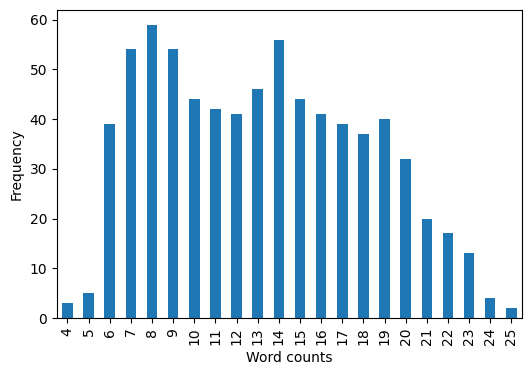

In [51]:
# word count for each comments
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

word_length = df['Text'].apply(lambda comment: len(comment.split()))
length_summary = word_length.value_counts().sort_index()
length_summary.plot(kind='bar')
plt.xlabel('Word counts')
plt.ylabel('Frequency')
plt.savefig('wordcounts.png', format='png')
plt.show()




In [52]:
# what is the hit topic?

## step 1: tokenize and remove stop words
cust_sw = set()
tokenized_comment = df['Text'].apply(lambda x: TweetTokenizer(preserve_case=True).tokenize(text=x))
for ls in tokenized_comment:
    for wd in ls:
        if len(wd) <= 2:
            cust_sw.add(wd)

stop_words = set(stopwords.words('english')).union(cust_sw)
def remove_stop_words(comment):
    word_list = TweetTokenizer(preserve_case=True).tokenize(text=comment)
    return [word for word in word_list if word not in stop_words]
        
df['tokens'] = df['Text'].apply(lambda comment: remove_stop_words(comment))
all_tokens = []
for i in df['tokens']:
    all_tokens.extend(i)
token_count = Counter(all_tokens)

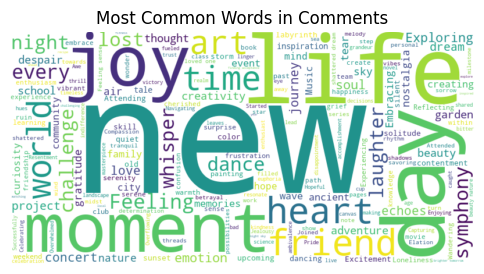

In [53]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

# Display the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Comments')
plt.savefig('wordshow.png', format='png')
plt.show()
